# Temporal differential models pt.1

We import a class that I personally created that allows to create a maze environment. We then define as a list of lists the structure of the maze. The class imported will create the logic to allows the agent to move as well as the user interface to display it. 

The maze consists of 7x7 blocks, so **49 states** and the agent can move up,right,down, left (**4 actions**).

At every episode the agent(green block) will always start on the top-left corner, if it finish in a red block, the agent will die, the episode ends and the agent will restart from the top-left corner. 

The goal is to reach the blue block in the less number of steps


The **reward** is always -0.1 except when the agent reach the *goal state* (blue block) which is 1 or when it finish in a red block, in this case in -2.

In [36]:
%run "environment.py"
#goal is -1, empty block is 1, wall is 0, mortal block is 2
#rewards: normal:-0.1, goal:100, mortal block:-100
#maxtimesteps:100

structure=[
    [ 1.,  1.,  1.,  2.,  2.,  2.,  2.],
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  0.,  1.,  2.,  2.,  2.,  1.],
    [ 1.,  1.,  1.,  1.,  1.,  2.,  -1.],
    [ 1.,  1.,  1.,  2.,  2.,  2.,  1.],
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.]
]
#maze, step reward, final reward, timesteps, mortal block
env=maze(structure, -0.1, 100, 100, -100)
#env.showEnv()

<img src="images/mazeTD.png">

In [31]:
import numpy as np

Next, we create another matrix that stores the values of these state and are initialized with zero.

In [32]:
QTableSARSA=np.zeros([env.getNStates(),env.getNActions()])
print("QTable shape:",QTableSARSA.shape)

QTable shape: (49, 4)


## SARSA

In SARSA algorithm, the action-value function q(s,a) is updated using the q(s',a') that the policy will select on the next timestep. So, the agent at each timestep will execute the action selected at the previous timestep and select the action for the next timestep. In this way it has all the information to update the *q(s,a)*

**SARSA** is called **on-policy** model because it updates q(s,a) using the q(s',a') selected by the same policy  

The agent is going through 200 *episodes* and it will take into account rewards far away into the future for every value funtion (*discount factor=0.99*). 

In addition, it will have an e-greedy policy with *e=0.15* it means that 
every 10 actions selection, 1.5 times the action is choose randomly.

In [33]:
import random

episodes=200
discount=0.99
epsilon=0.15
alpha=0.2
#info to plot
stepsEpisodesSARSA=[]
rewardsEpisodesSARSA=[]

#e-greedy policy
def policy(state):
    #random.random() return a number between 0 and 1.
    if random.random()<epsilon:
        #select an action randomly(action 0,1,2 or 3)
        action=random.randint(0,3)
    else:
        #choose action greedily based on the agent policy
        action=np.argmax(QTableSARSA[state,:])
    return action

#SARSA algorithm
for episode in range(episodes):
    #reset the game for a new episode and return the state in which the agent is
    s = env.reset()
    
    if episode%50==0:
        env.displayOptimalPath(QTableSARSA, episode)
    
    #This variable became true if the game is finished
    d=False
    #count how many steps the agent needs to finish a single game
    nSteps=0
    rewardEpisode=0
    #given the state, select the action e-greedy
    action=policy(s)
    while not(d):
        #env.observe()
        
        #return next state, reward, if the state has finished
        s1,r,d=env.step(action)
        #Use the new state to select the next action to execute at the next timestep
        nextAction=policy(s1)
        #UPDATE ACTION-STATE FUNCTION
        QTableSARSA[s][action]=QTableSARSA[s][action] + alpha * ((r + discount*QTableSARSA[s1][nextAction])-QTableSARSA[s][action])
        
        s=s1
        action=nextAction
        
        nSteps+=1
        rewardEpisode += r
        
    #Store how many timesteps the agent needed to complete a single game
    stepsEpisodesSARSA.append(nSteps)
    #Store the total reward the agent obtained from a single game
    rewardsEpisodesSARSA.append(rewardEpisode)
    
print("done!")

done!


## Q-Learning

In Q-Learning algorithm, the action-value function q(s,a) is updated using the best q(s',a'). 

So, the agent at each timestep will execute the action selected at the previous timestep and select the action for the next timestep. In this way it has all the information to update the *q(s,a)*

**SARSA** is called **on-policy** model because it updates q(s,a) using the q(s',a') selected by the same policy 

In [34]:
QTableQL=np.zeros([env.getNStates(),env.getNActions()])
#info to plot
stepsEpisodesQL=[]
rewardsEpisodesQL=[]


#e-greedy policy
def policy(state):
    #random.random() return a number between 0 and 1.
    if random.random()<epsilon:
        #select an action randomly(action 0,1,2 or 3)
        action=random.randint(0,3)
    else:
        #choose action greedily based on the agent policy
        action=np.argmax(QTableQL[state,:])
    return action

#Q-LEARNING algorithm
for episode in range(episodes):
    #reset the game for a new episode and return the state in which the agent is
    s = env.reset()
    #This variable became true if the game is finished
    d=False
    
    if episode%50==0:
        env.displayOptimalPath(QTableQL, episode)
        
    #count how many steps the agent needs to finish a single game
    nSteps=0
    rewardEpisode=0
    while not(d):
        #given the state, select the action e-greedy
        action=policy(s)
        
        #return next state, reward, if the state has finished
        s1,r,d=env.step(action)
        
        #UPDATE ACTION-STATE FUNCTION
        QTableQL[s][action]=QTableQL[s][action] + alpha * ((r + discount*QTableQL[s1][np.argmax(QTableQL[s1,:])])-QTableQL[s][action])
        
        s=s1
        
        nSteps+=1
        rewardEpisode += r
        
    #Store how many timesteps the agent needed to complete a single game
    stepsEpisodesQL.append(nSteps)
    #Store the total reward the agent obtained from a single game
    rewardsEpisodesQL.append(rewardEpisode)
    
print("done!")

done!


# SARSA vs Q-Learning

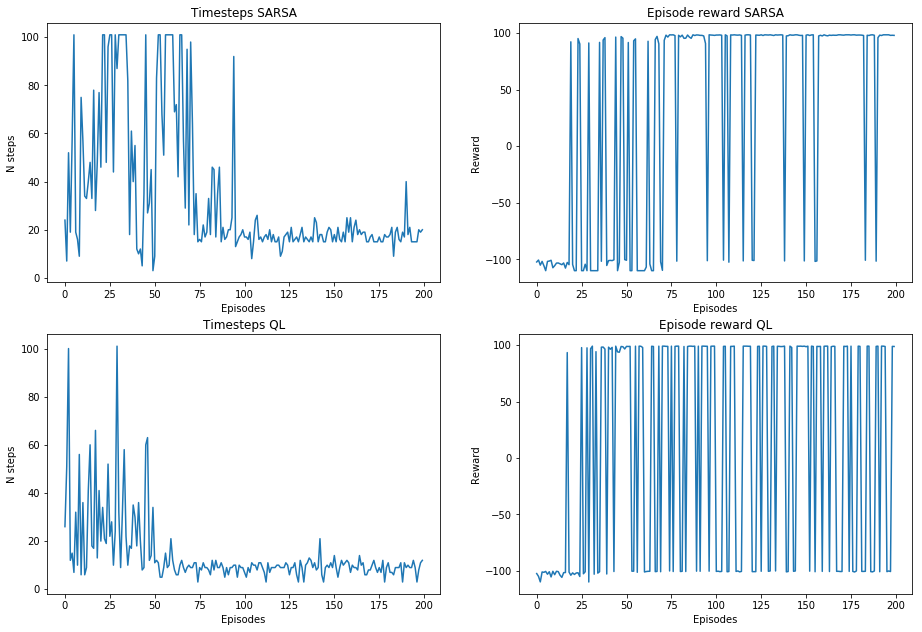

In [35]:
import matplotlib.pyplot as plt
f, ((plt1,plt2), (plt3,plt4))=plt.subplots(2,2)
#SARSA
plt1.plot([i for i in range(episodes)], stepsEpisodesSARSA)
plt1.set_xlabel("Episodes")
plt1.set_ylabel("N steps")
plt1.set_title("Timesteps SARSA")

plt2.plot([i for i in range(episodes)], rewardsEpisodesSARSA)
plt2.set_xlabel("Episodes")
plt2.set_ylabel("Reward")
plt2.set_title("Episode reward SARSA")

plt3.plot([i for i in range(episodes)], stepsEpisodesQL)
plt3.set_xlabel("Episodes")
plt3.set_ylabel("N steps")
plt3.set_title("Timesteps QL")

plt4.plot([i for i in range(episodes)], rewardsEpisodesQL)
plt4.set_xlabel("Episodes")
plt4.set_ylabel("Reward")
plt4.set_title("Episode reward QL")

f.set_size_inches(15.5,10.5)
plt.show()

It is possible to notice that the **SARSA** algorithm needs aroung 100 episodes to find an optimal path. Actually it is a sub-optimal path because is not the shortest one, instead it is the most safe based on the policy. Infact, could occurs that the action selected is not the optimal one, in such case, the agent could reach a red block and loss the game with a big negative reward. In order to avoid it, SARSA algorithm learned a path to avoid negative rewards caused by the policy. In simply words, it learned to know it's random and self-harmful behaviour and minimize the negative results.
On the other hand, **Q-Learning** needs around 50 episodes to find the optimal path. However, is important to notice that it's reward for episode is not constant. This is due to the e-greedy policy. The agent will always make the optimal path, but due to the e-greedy policy, it will often fall on a red block and get a big negative reward.

## Conclusion

In conclusion, the **SARSA** algorithm needs more time to find a good solution but on the other hand it will minimize the possible negative rewards in a "random environment". **Q-Learning** is more fast to find a solution but in a "random environment" it will struggle to finish the task with a good reward. With random envirnment I mean any possible event that make the agent diverge from its decision. In this case, the fact that sometime the action that the agent will execute is not the one decided.